In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score 

In [33]:
data = pd.read_csv("/Users/shivanshmahajan/Desktop/Medical App/obesity/Obesity Classification.csv")

In [34]:
data

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [36]:
data.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [37]:
data.drop("ID",axis=1,inplace=True)

In [38]:
fig = plt.figure(figsize = (10,8))
features=["Gender","Label"]
for i in range(len(features)):
    plt.subplot(2, 1, i+1)
    ax=sns.countax=sns.countplot(data =data , x = "Gender", hue ='Label')plot(x=features[i],data=data, palette="Set2")
plt.show()

SyntaxError: invalid syntax (4256220939.py, line 5)

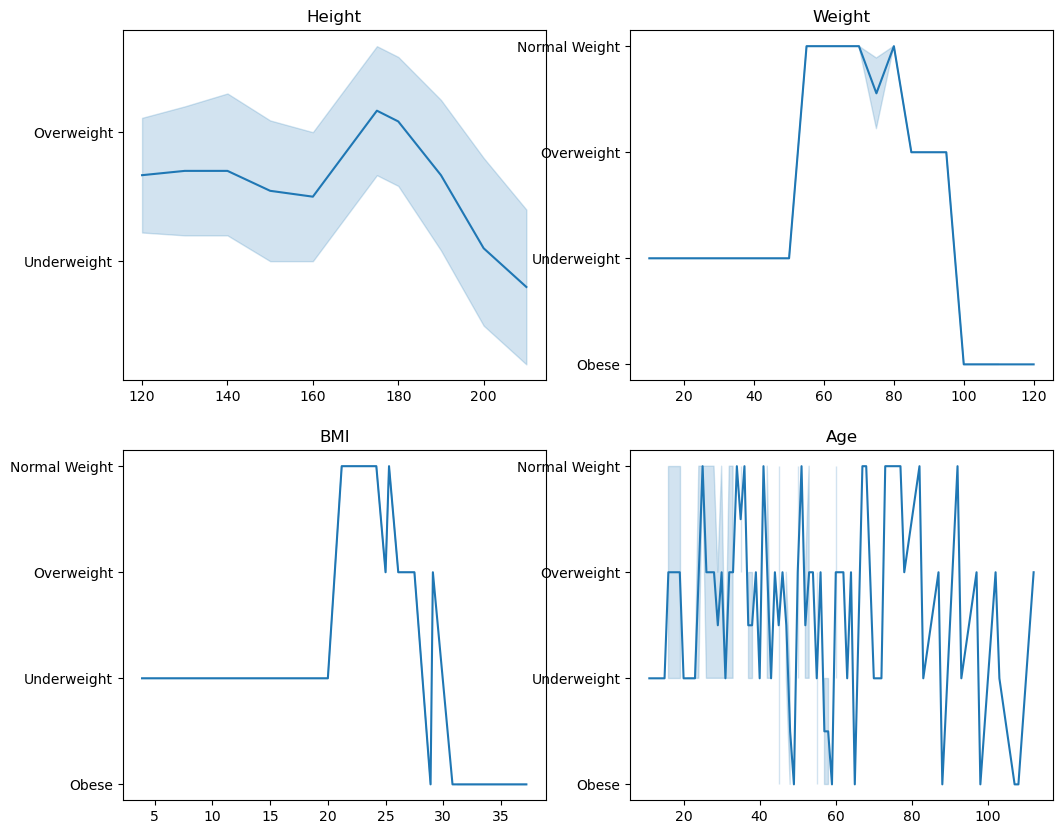

In [39]:
fig = plt.figure(figsize = (12,10))
i=1
features=["Height","Weight","BMI","Age"]
for x in features:
    plt.subplot(2,2, i)
    ax=sns.lineplot(data =data , x = data[x],y="Label")
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()

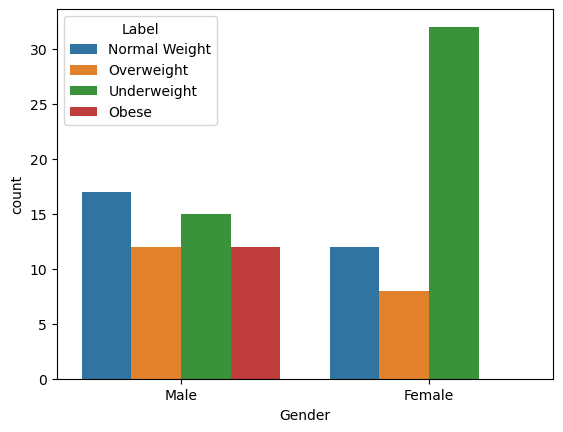

In [40]:
ax=sns.countplot(data =data , x = "Gender", hue ='Label')

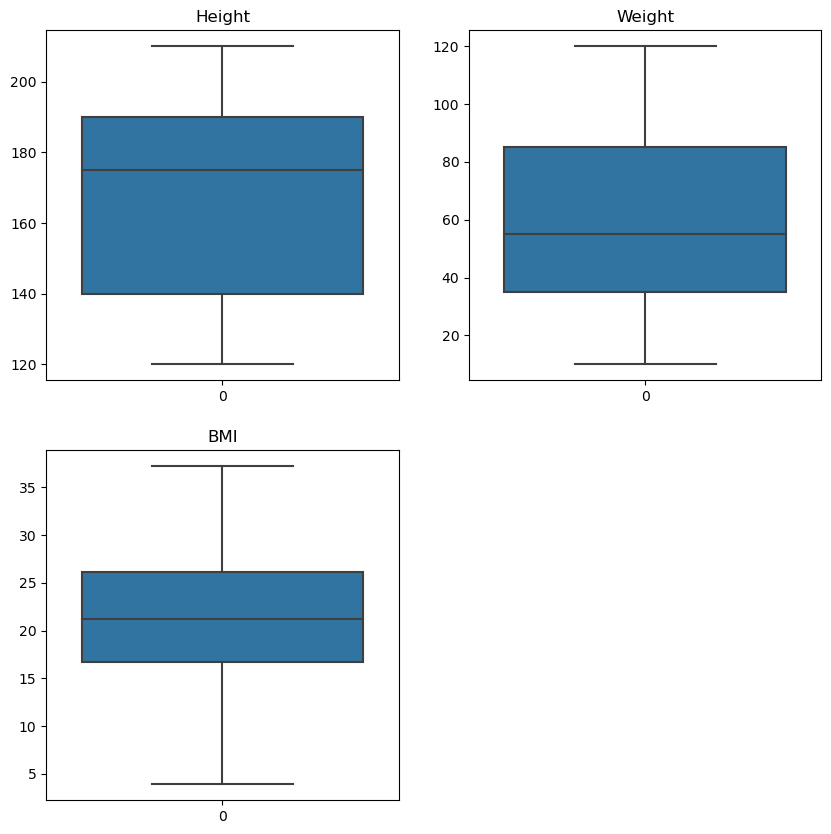

In [41]:
fig = plt.figure(figsize = (10,10))
features=["Height","Weight","BMI"]
i=1
for x in features:
    plt.subplot(2, 2, i)
    ax=sns.boxplot(data[x])
    plt.title(str(x), loc='center')
    i+=1
plt.show()

In [42]:
encoder=LabelEncoder()
data["Gender"]=encoder.fit_transform(data["Gender"])
data["Label"]=encoder.fit_transform(data["Label"])

data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1


In [43]:
training=data.drop("Label",axis=1)
target=data["Label"]

In [44]:
X_train,X_test,y_train,y_test = train_test_split(training,target,test_size=0.15,random_state=42)

In [45]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test,preds))

1.0


In [47]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test,preds))

1.0


In [55]:
print((X_test))

[[0.48514851 0.         0.         0.54545455 0.58558559]
 [0.06930693 1.         0.61111111 0.54545455 0.58558559]
 [0.33663366 1.         0.77777778 0.81818182 0.81981982]
 [0.01980198 1.         0.61111111 0.13636364 0.18318318]
 [0.24752475 1.         0.77777778 0.59090909 0.60960961]
 [0.4950495  0.         0.         0.59090909 0.63363363]
 [0.12871287 0.         0.44444444 0.40909091 0.51951952]
 [0.40594059 0.         0.11111111 0.59090909 0.63363363]
 [0.10891089 1.         0.66666667 0.09090909 0.13213213]
 [0.11881188 0.         0.44444444 0.36363636 0.48348348]
 [0.17821782 0.         0.33333333 0.18181818 0.28228228]
 [0.07920792 0.         0.44444444 0.13636364 0.18318318]
 [0.13861386 1.         0.61111111 0.63636364 0.64264264]
 [0.12871287 1.         0.66666667 0.31818182 0.44444444]
 [0.46534653 1.         1.         0.90909091 0.90990991]
 [0.08910891 0.         0.44444444 0.18181818 0.28228228]
 [0.95049505 1.         1.         0.86363636 0.75075075]]


Weight: 0.4352635557034872
BMI: 0.401468022733901
Height: 0.07685890380675639
Age: 0.06838919538273085
Gender: 0.018020322373124627


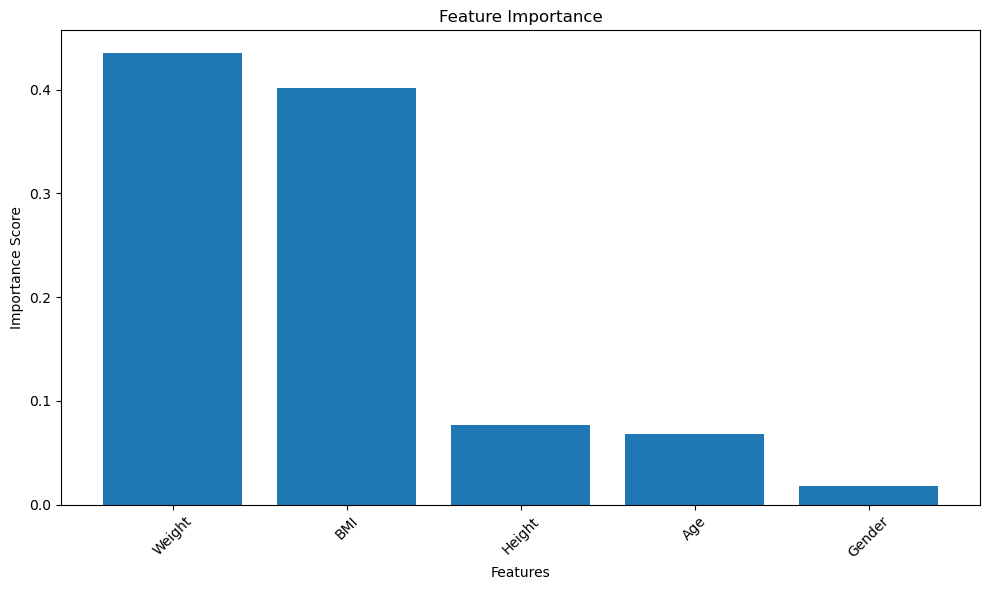

In [49]:
feature_importances = model.feature_importances_
#print(feature_importances)
sorted_indices = np.argsort(feature_importances)[::-1]

# Arrange feature importances and names in the sorted order
sorted_importances = feature_importances[sorted_indices]
sorted_names = np.array(data.columns)[sorted_indices]
for name, importance in zip(sorted_names, sorted_importances):
    print(f"{name}: {importance}")
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [50]:
model.predict(X_test)

array([0, 0, 1, 3, 0, 2, 0, 2, 3, 3, 3, 3, 0, 3, 1, 3, 1])

In [51]:
import joblib
joblib.dump(model, 'obesity.joblib')
loaded_model = joblib.load('obesity.joblib')

In [29]:
import pickle
with open('obesity.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('obesity.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    

In [ ]:
input_data=()
input_data=np.asarray(input_data)
input_data_reshaped=input_data.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
#print(prediction)
if(prediction==0):
    print('normal weight')
elif(prediction==1):
    print('obese')
elif(prediction==2):
    print('overweight')  
else:
    print("underweight")